## Decision Tree Classifier:

A Decision Tree is a simple representation of the classification problem. It comes under a Supervised Machine Learning problem where we need to predict the class or category based on the input data.

#### Decision Tree consists of :
1. Node
2. Branch
3. Leaf Node

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.    
The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning.      
This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

In [1]:
# Let's start with the database we have.

In [22]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Let's perform the basic EDA on the file
# Let's check the shape of the data
data.shape

(768, 9)

In [5]:
# Check if there are any null values in the data.
data.isnull().sum()
# As of now there are no null values in the data.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Let's check the type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Based on the initial look of the data, we can say that Pregnancies & Outcome seems categorical data.
# Let's check the same
data['Pregnancies'].value_counts()
# Pregrancies above 12 are seems unrealistic.

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [8]:
# Let's check the count of the values in each catogory.
data['Outcome'].value_counts()
# Based on the count we can say that 268 records have a diabeties.

0    500
1    268
Name: Outcome, dtype: int64

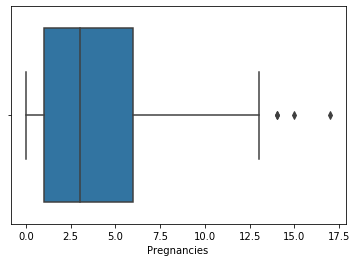

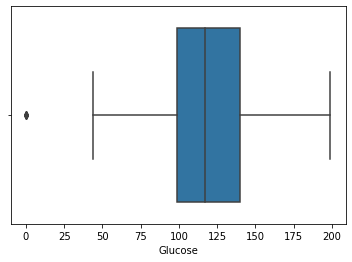

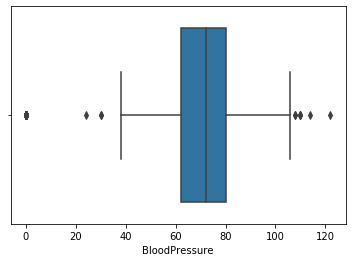

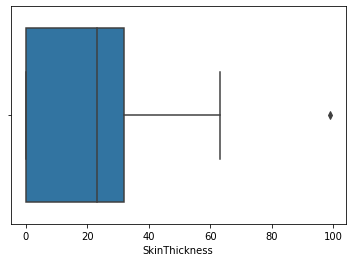

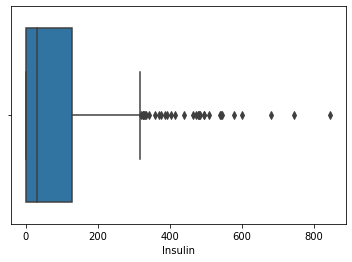

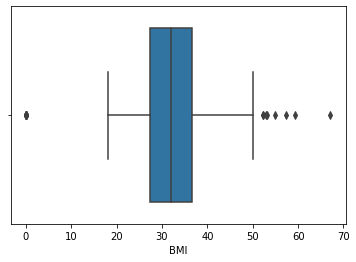

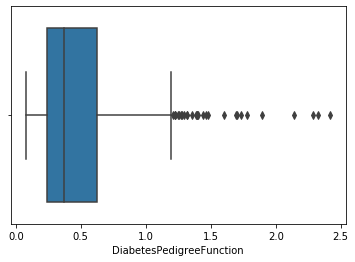

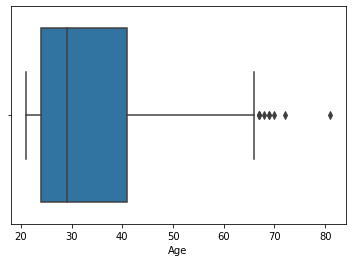

In [9]:
# Let's visualize the outliers in the data.
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                      'DiabetesPedigreeFunction', 'Age']
for feature in numerical_features:
    sns.boxplot(data[feature])
    plt.show()

In [10]:
# Let's check the count of outliers in the data.
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                      'DiabetesPedigreeFunction', 'Age']
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    print(feature, data[data[feature]<LL].shape[0] + data[data[feature]>UL].shape[0])

Pregnancies 4
Glucose 5
BloodPressure 45
SkinThickness 1
Insulin 34
BMI 19
DiabetesPedigreeFunction 29
Age 9


In [11]:
# Let's check the count of outliers in the data.
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                      'DiabetesPedigreeFunction', 'Age']
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    print(feature, round(((data[data[feature]<LL].shape[0] + data[data[feature]>UL].shape[0])/data.shape[0])*100,2))

Pregnancies 0.52
Glucose 0.65
BloodPressure 5.86
SkinThickness 0.13
Insulin 4.43
BMI 2.47
DiabetesPedigreeFunction 3.78
Age 1.17


In [12]:
# As the outlier count is less than 6%.
# We will keep all the outliers in the data.

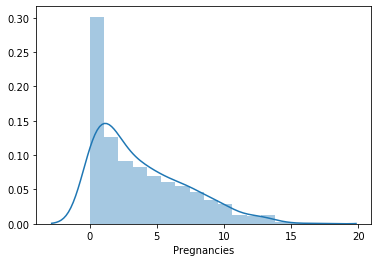

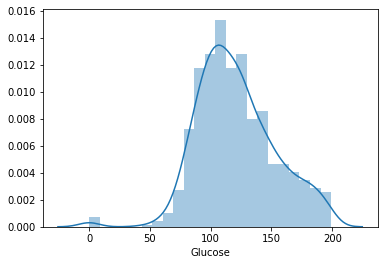

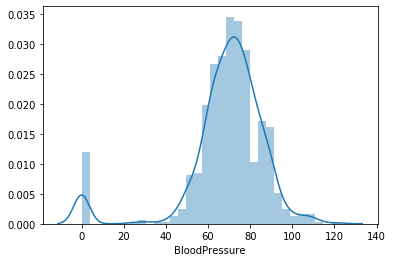

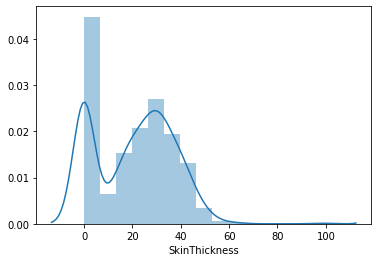

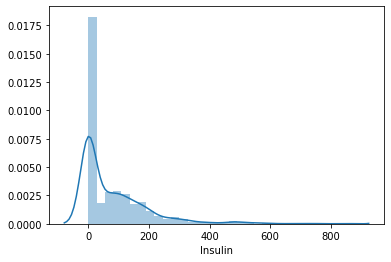

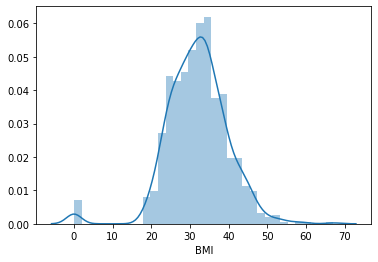

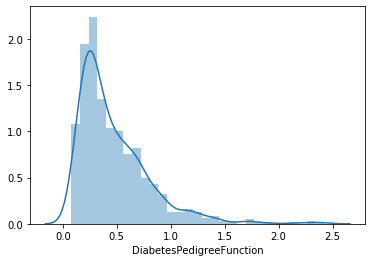

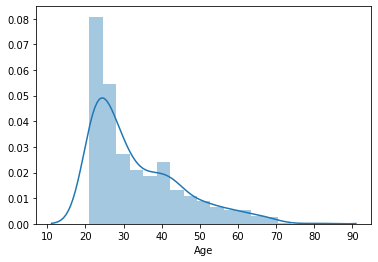

In [13]:
# Let's check the distribution of the numerical data.
# For time being, we will keep Pregnancies in the numerical features.
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                      'DiabetesPedigreeFunction', 'Age']
for feature in numerical_features:
    sns.distplot(data[feature])
    plt.show()
    

In [14]:
# Let's slice the data into X & Y for the creation of Decision Tree.
X = data.drop('Outcome', 1)
Y = data['Outcome']
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


In [15]:
# Let's split data into training & testing.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)
print('Shape of x_train dataset: ', x_train.shape)
print('Shape of x_test dataset: ', x_test.shape)
print('Shape of y_train dataset: ', y_train.shape)
print('Shape of y_test dataset: ', y_test.shape)

Shape of x_train dataset:  (514, 8)
Shape of x_test dataset:  (254, 8)
Shape of y_train dataset:  (514,)
Shape of y_test dataset:  (254,)


In [16]:
# Building Decision Tree Model
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
y_pred_test = DTC.predict(x_test)

In [17]:
# Model Evaluation
accuracy_score(y_test, y_pred_test)

0.7401574803149606

In [ ]:
#Visualizing Decision Trees

dot_data = StringIO()
export_graphviz(DTC, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True, feature_names = numerical_features, class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [19]:
# Optimizing Decision Tree Performance
DTC_1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
DTC_1.fit(x_train, y_train)
y_pred_test_1 = DTC_1.predict(x_test)

In [21]:
# Model Evaluation of the optimized model.
accuracy_score(y_test, y_pred_test_1)

# After changing the criterian we can see there is increase in accuracy by 4%

0.7874015748031497

In [27]:
# Optimizing Decision Tree Performance using GridSearchCV
params = {'max_leaf_nodes': np.arange(2, 100), 'min_samples_split': np.arange(2, 50), 
          'criterion':['gini', 'entropy'], 'max_depth':np.arange(2,10)}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 75264 candidates, totalling 225792 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225792 out of 225792 | elapsed: 15.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='depr...
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 

In [28]:
# Find the best parameters.
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [29]:
final_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=2, 
                                   max_depth=6)
final_tree.fit(x_train, y_train)
y_pred_test_final = final_tree.predict(x_test)

In [30]:
# Model Evaluation of the optimized model.
accuracy_score(y_test, y_pred_test_final)

# After changing the criterian we can see there is increase in accuracy by 4%

0.7440944881889764